In [52]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
plt.rcParams["axes.grid"] = False

In [53]:
data=sio.loadmat("cardio.mat")

In [54]:
X=data['X']
y=data['y']
size=X.shape[0]
pca=PCA(n_components=2)
pca.fit(X)
X=pca.transform(X)

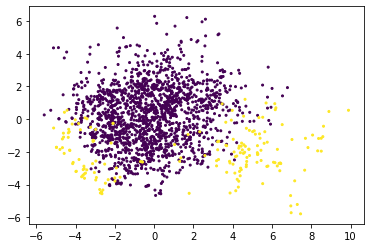

In [55]:
#Visualize train data
plt.scatter(X[:,0],X[:,1],s=4,c=y.reshape(size))

In [56]:
# Split data
X_train, X_test= train_test_split(X, test_size=0.1, random_state=42)

In [65]:
#Creat grid for visualize
x = np.linspace(np.min(X_train[...,0])-1,np.max(X_train[...,0])+1,100)
y = np.linspace(np.min(X_train[...,1])-1,np.max(X_train[...,1])+1,50)
X_,Y_ = np.meshgrid(x,y)
pos = np.array([X_.flatten(),Y_.flatten()]).T
print(pos.shape)
print(np.max(pos[...,1]))

(5000, 2)
7.289765420603934


In [66]:
# define the number of clusters to be learned
k = 2

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k
means = np.random.choice(X_train.flatten(), (k,X_train.shape[1]))
print(means)
print(weights)

[[ 3.17679079 -1.03225076]
 [-1.95037276  0.47468892]]
[0.5 0.5]


In [67]:
# create and initialize a Positive semidefinite convariance matrix 
cov = []
for i in range(k):
    cov.append(make_spd_matrix(X_train.shape[1]))
cov = np.array(cov)
print(cov.shape)

(2, 2, 2)


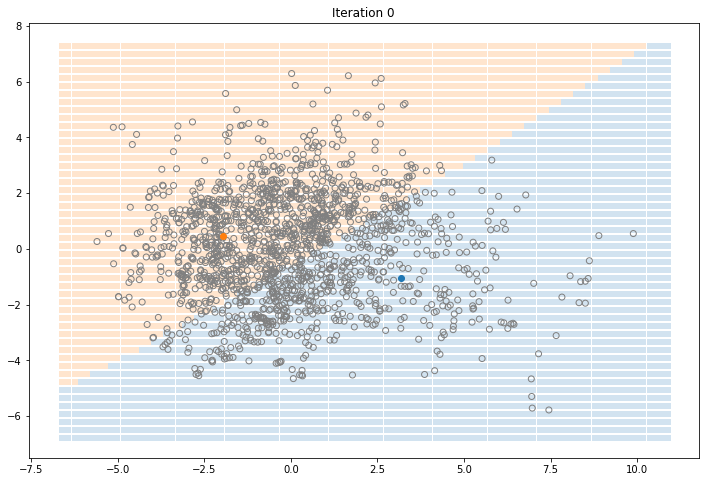

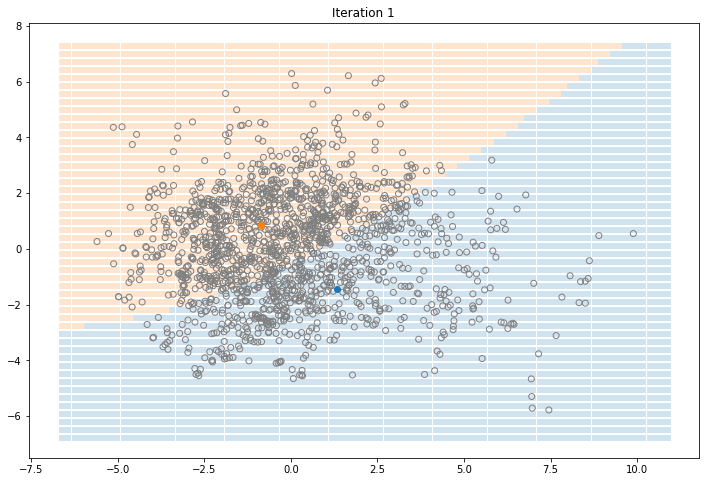

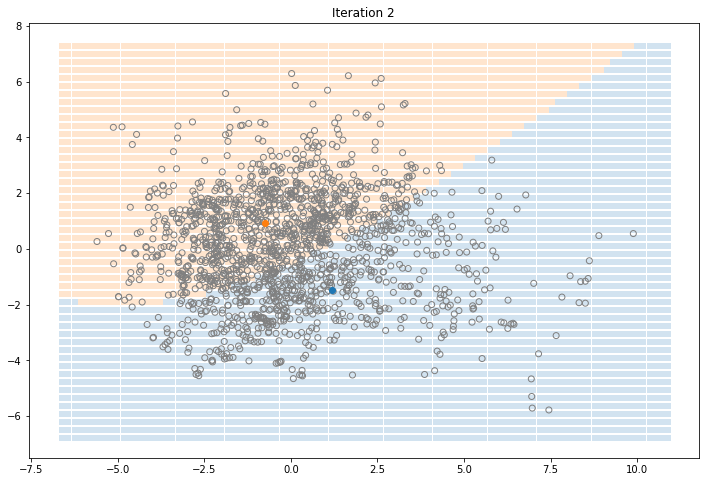

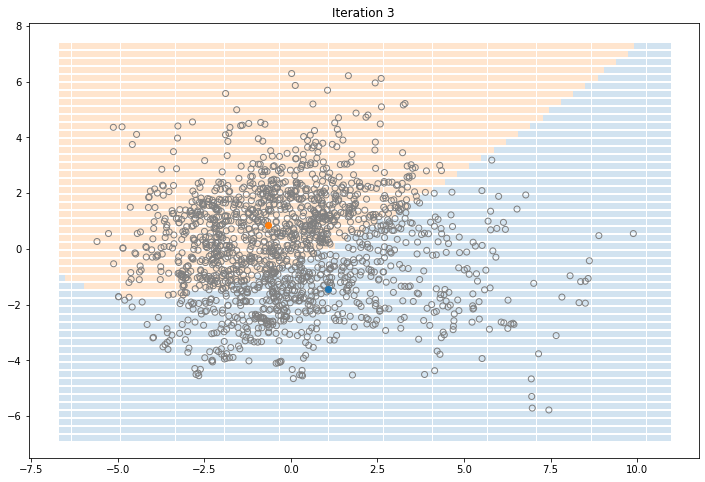

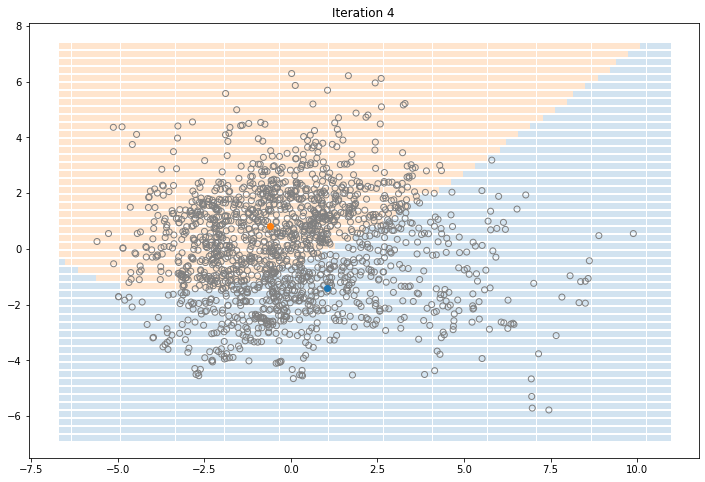

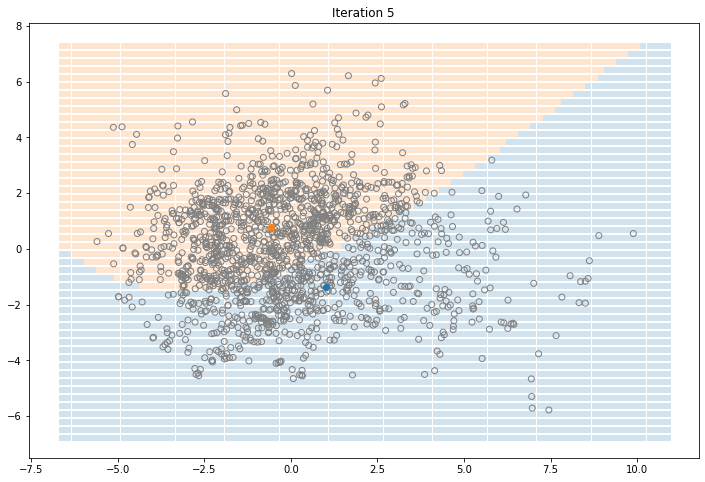

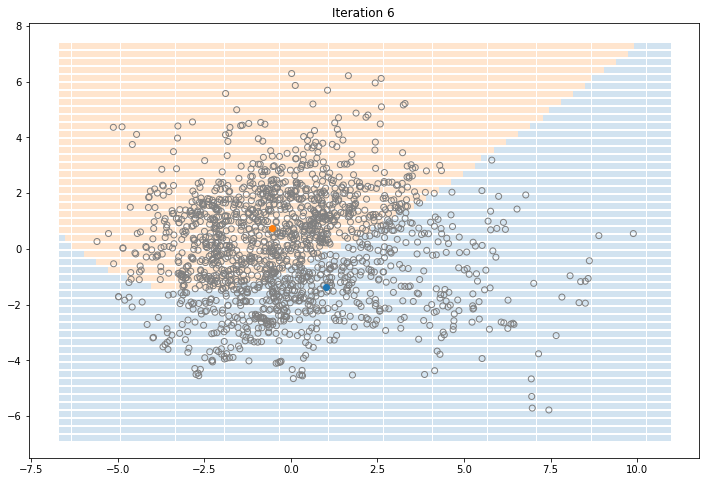

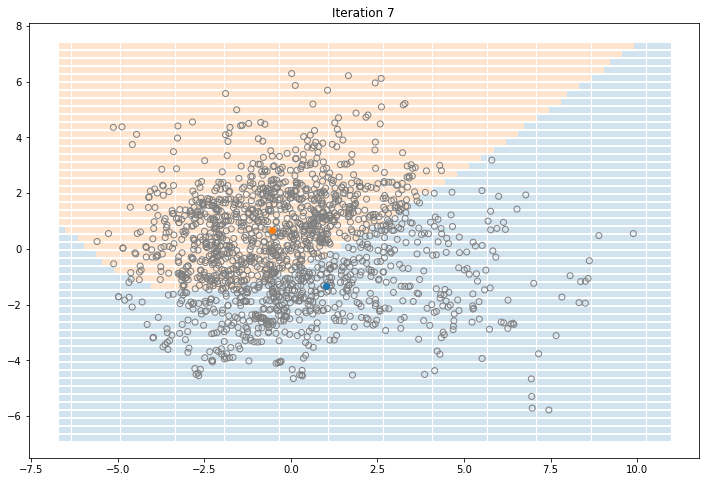

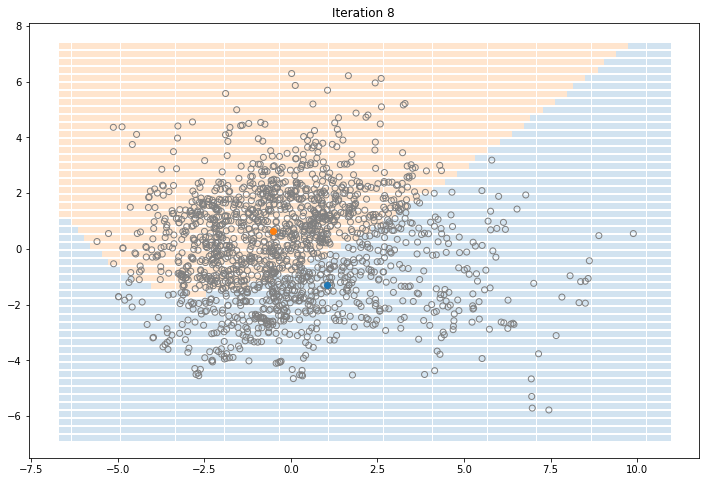

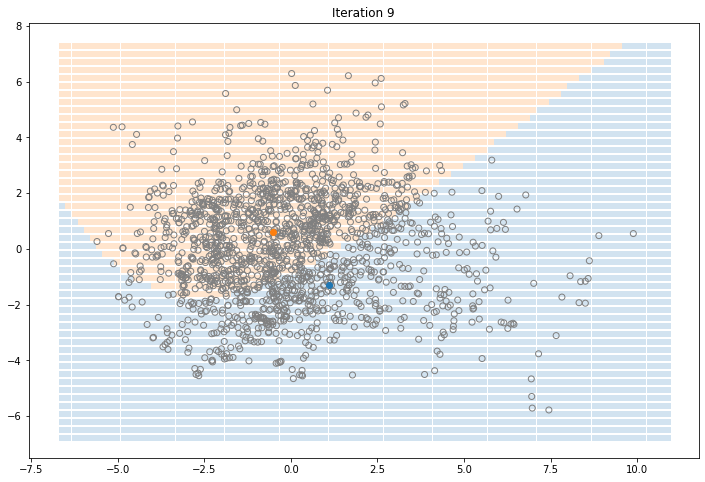

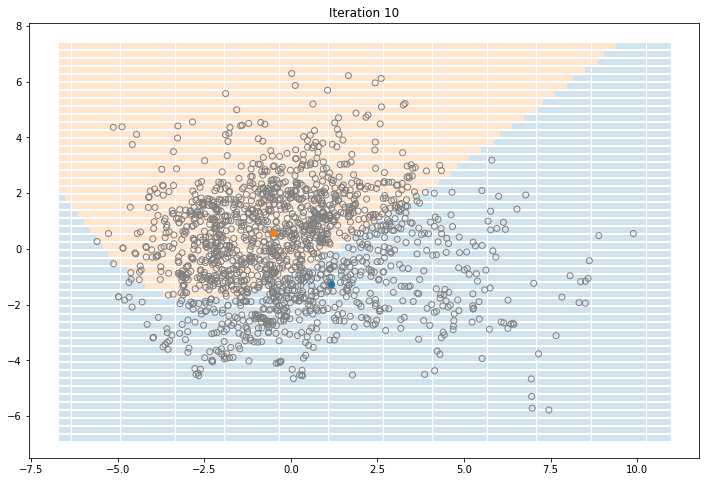

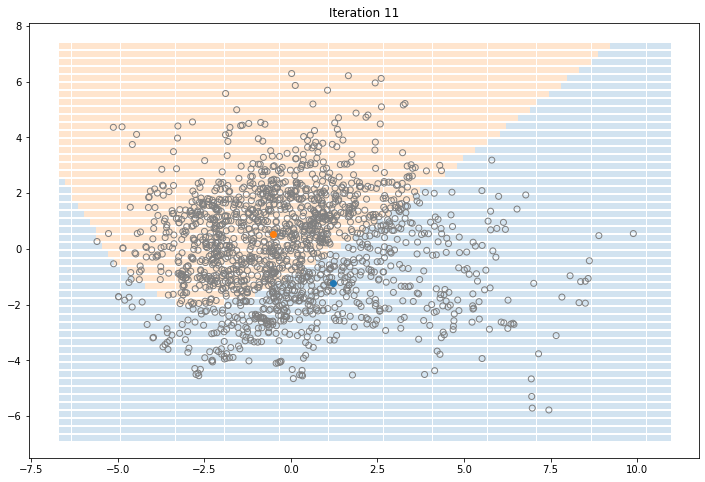

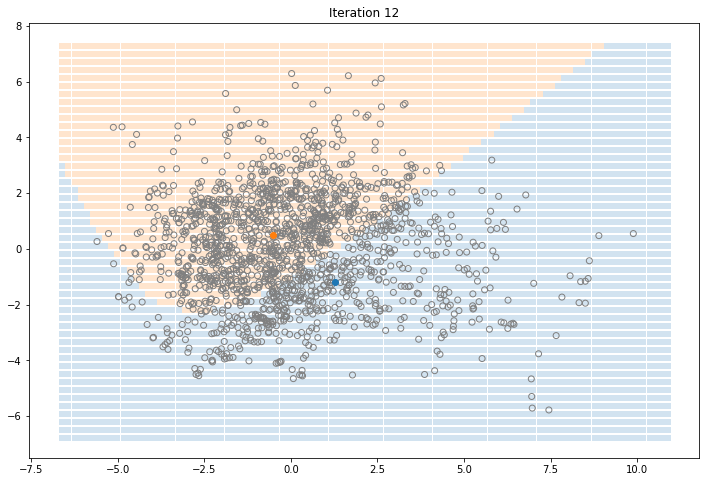

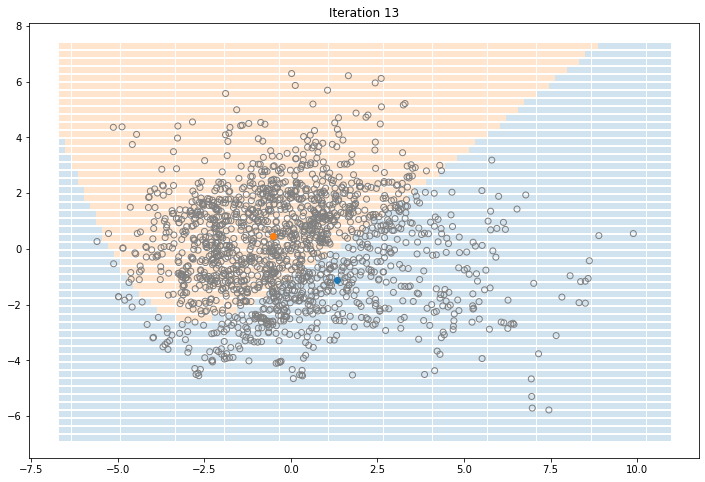

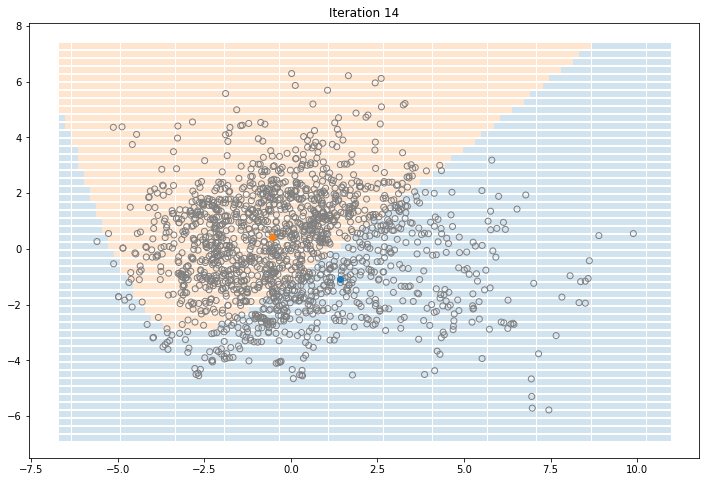

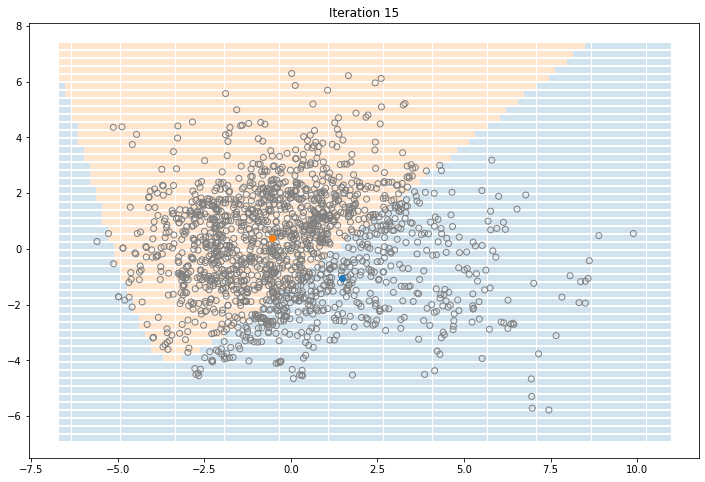

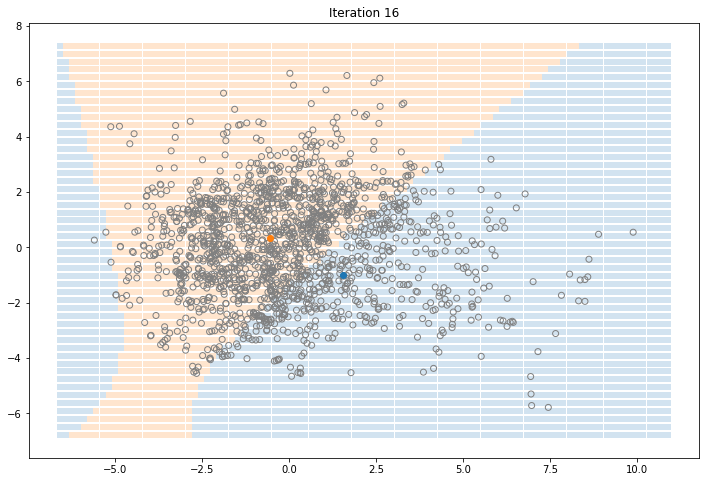

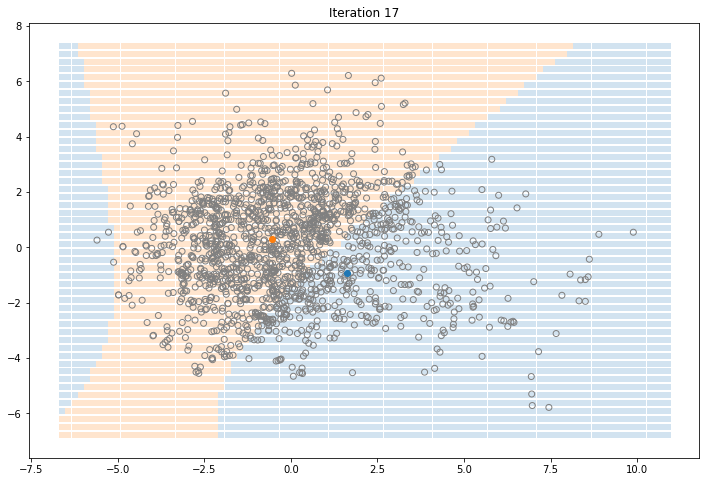

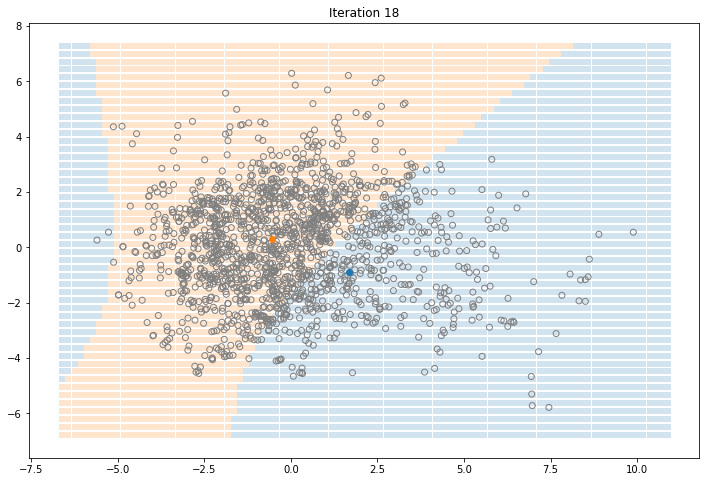

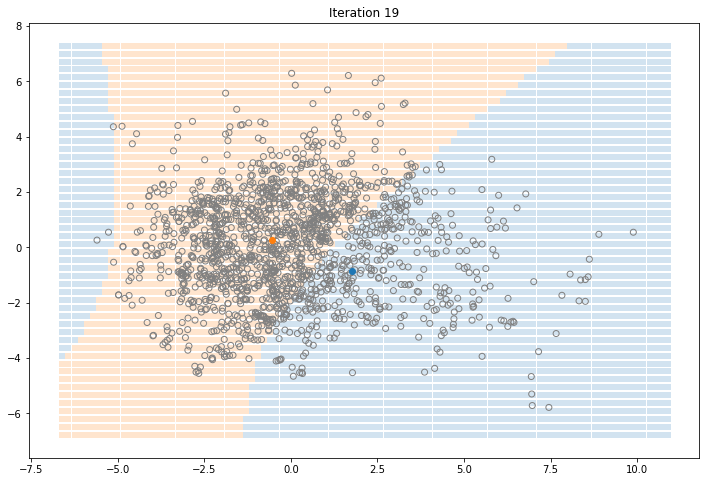

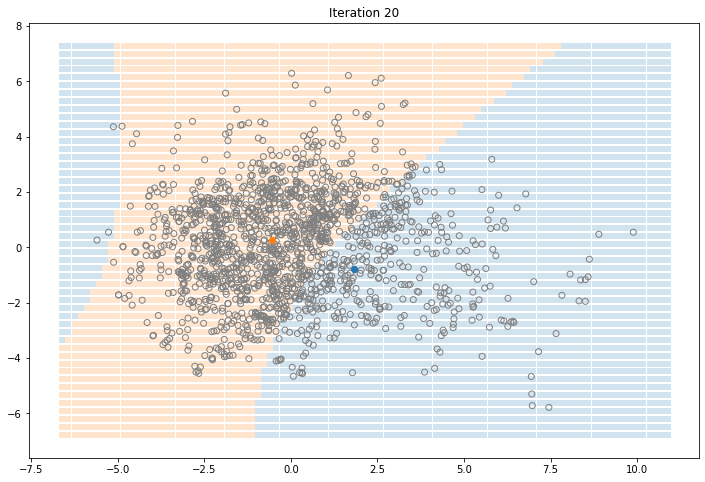

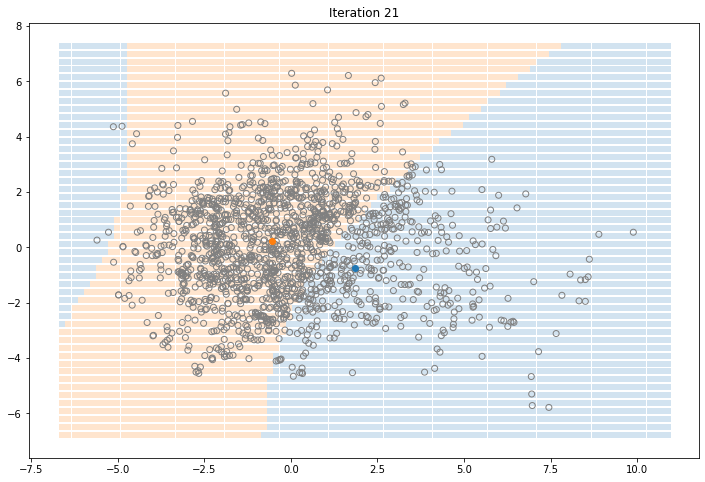

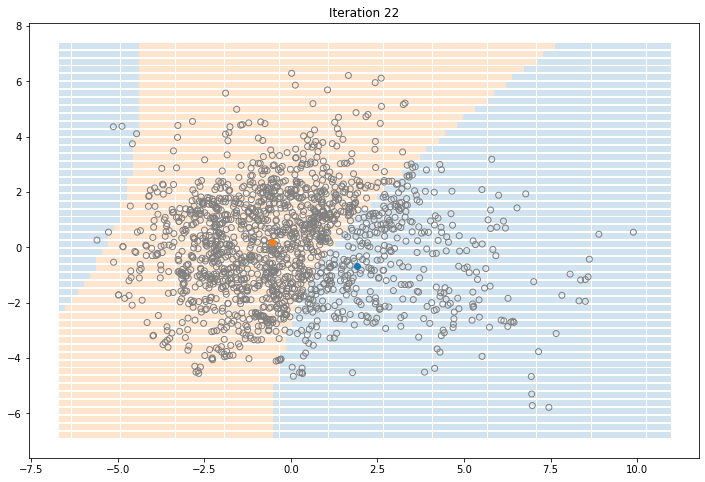

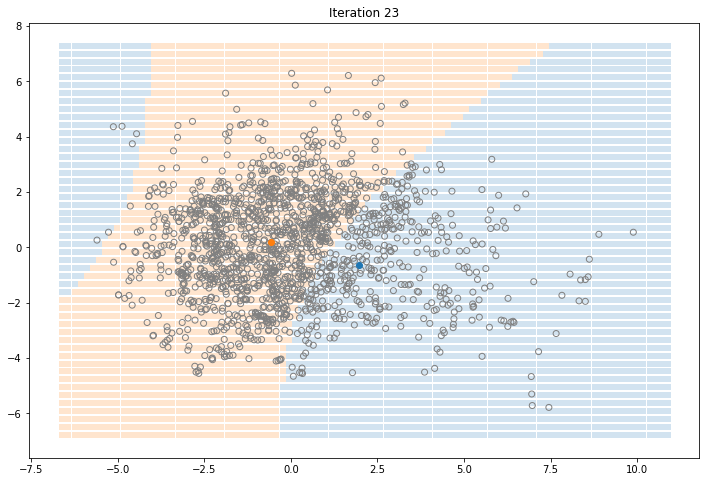

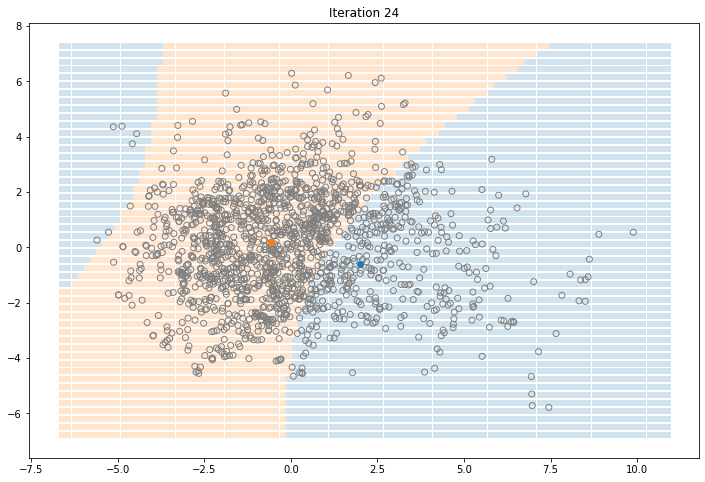

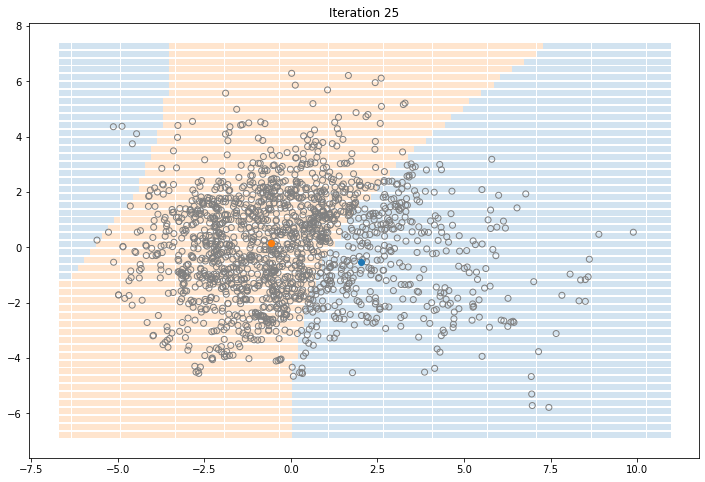

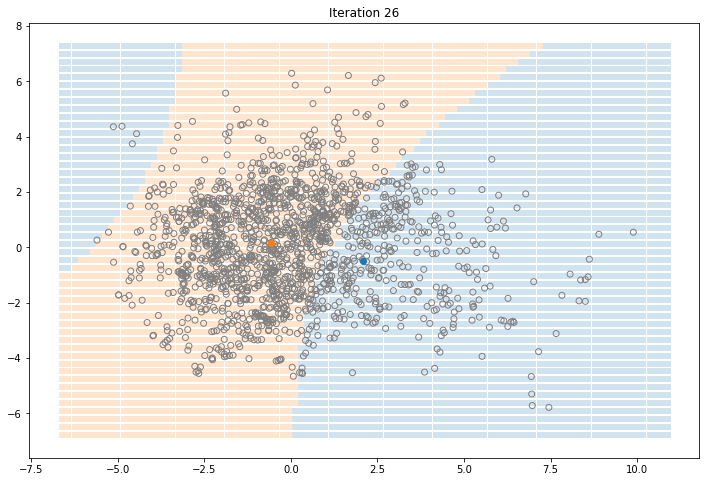

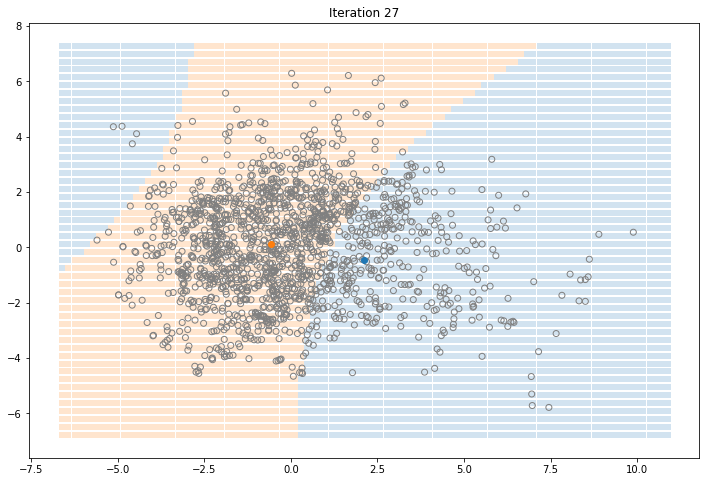

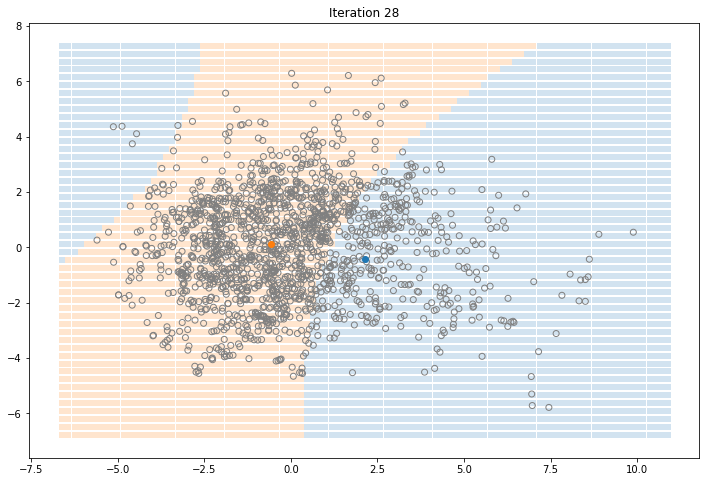

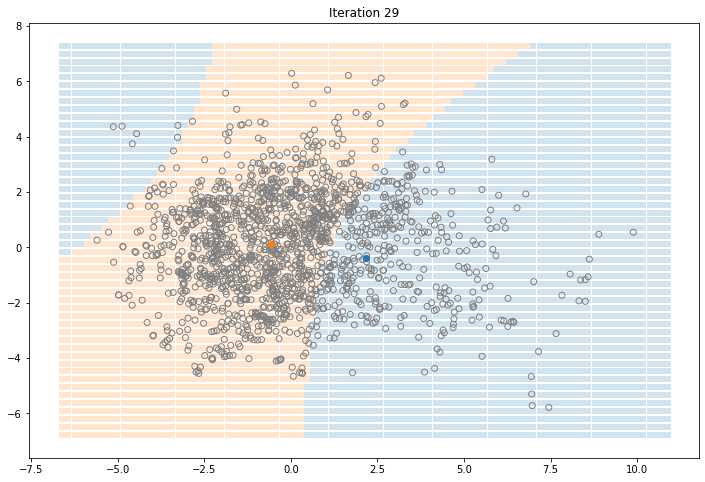

In [68]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'magenta', 'yellow', 'red', 'brown', 'grey']
eps=1e-8

# run GMM for 30 steps
for step in range(30):

  # visualize the learned clusters
  if step % 1 == 0:
    plt.figure(figsize=(12,int(8)))
    plt.title("Iteration {}".format(step))
    axes = plt.gca()
    
    likelihood = []
    for j in range(k):
        likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
    likelihood = np.array(likelihood)
    predictions = np.argmax(likelihood, axis=0)
    
    for c in range(k):
        pred_ids = np.where(predictions == c)
        plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')
    
    plt.scatter(X_train[...,0], X_train[...,1], facecolors='none', edgecolors='grey')
    
    for j in range(k):
        plt.scatter(means[j][0], means[j][1], color=colors[j])

    #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()

    likelihood = []
  # Expectation step
    for j in range(k):
        likelihood.append(multivariate_normal.pdf(x=X_train, mean=means[j], cov=cov[j]))
    likelihood = np.array(likelihood)
  
    
    b = []
  # Maximization step 
    for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian
        b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

    # updage mean and variance
        means[j] = np.sum(b[j].reshape(len(X_train),1) * X_train, axis=0) / (np.sum(b[j]+eps))
        cov[j] = np.dot((b[j].reshape(len(X_train),1) * (X_train - means[j])).T, (X_train - means[j])) / (np.sum(b[j])+eps)

    # update the weights
        weights[j] = np.mean(b[j])
    
    

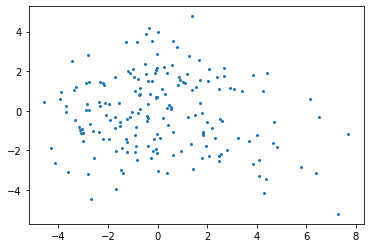

In [69]:
#Visualize test data
plt.scatter(X_test[:,0],X_test[:,1],s=4)

In [70]:
#Fit model on test data
likelihood = []
for j in range(k):
    likelihood.append(multivariate_normal.pdf(x=X_test, mean=means[j], cov=cov[j]))
likelihood = np.array(likelihood)
predictions = np.argmax(likelihood, axis=0)

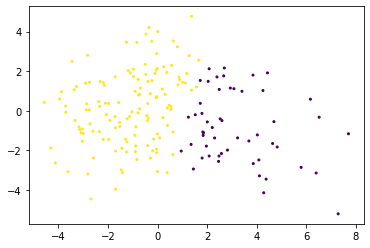

In [71]:
#Visualize anomalous data on test set
plt.scatter(X_test[:,0],X_test[:,1],s=4,c=predictions)